# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Create two new dataframes
north = pd.read_csv("NorthCallCenter.csv")
south = pd.read_csv("SouthCallCenter.csv")

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch? 

In [3]:
north.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [4]:
#Code Used:
north_reps = north["Rep ID"].value_counts().count()
north_reps

9

#### EDA Question 1B:  How many reps are in the South branch? 

In [5]:
south.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [6]:
#Code Used:
south_reps = south["Rep ID"].value_counts().count()
south_reps

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [7]:
#Code Used:
north[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].describe()

,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
count,245.000000,245.000000,82.000000,245.000000
mean,9.987755,1.914286,3.048780,2.967347
std,1.403980,0.771416,1.456382,0.843827
min,8.000000,1.000000,1.000000,2.000000
25%,9.000000,1.000000,2.000000,2.000000
50%,10.000000,2.000000,3.000000,3.000000
75%,11.000000,3.000000,4.000000,4.000000
max,12.000000,3.000000,5.000000,4.000000


In [8]:
north[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [9]:
#Code Used:
south[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].describe()

,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
count,314.00000,314.000000,126.000000,314.000000
mean,10.05414,1.910828,3.000000,3.076433
std,1.40751,0.860016,1.308434,0.819424
min,8.00000,1.000000,1.000000,2.000000
25%,9.00000,1.000000,2.000000,2.000000
50%,10.00000,2.000000,3.000000,3.000000
75%,11.00000,3.000000,4.000000,4.000000
max,12.00000,3.000000,5.000000,4.000000


In [10]:
south[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [11]:
# Code Used:
north_time_block_calls = north["Time Block"].value_counts()
north_time_block_calls
south_time_block_calls = south["Time Block"].value_counts()
south_time_block_calls
total_time_block_calls = south["Time Block"].value_counts() +  north["Time Block"].value_counts()
total_time_block_calls

10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There really isn't any missing data, with the expection of NaN values in the 'Incoming Wait Time" column, but I am not sure it would be wise to remove this data at this time since it correspond to Outgoing calls in the 'Incoming or Outgoing' columns

# North Dataset: Looking for/at missing data

In [12]:
# Code Used
# Add Additional Cells as needed.

print(north.shape)
north_numeric = north.select_dtypes(include=[np.number])
north_numeric_cols = north_numeric.columns.values
print(f'North Numeric Columns:', north_numeric_cols)
north_non_numeric = north.select_dtypes(exclude=[np.number])
north_non_numeric_cols = north_non_numeric.columns.values
print(f'North Non Numeric Colums:', north_non_numeric_cols)
north.tail(50)

(245, 15)
North Numeric Columns: ['Unnamed: 0' 'Lost Call' 'Abandoned' 'Busy Minutes' 'Not Ready Minutes'
 'Incoming Wait Time' 'During Call Wait Time' 'Calls']
North Non Numeric Colums: ['Branch' 'Call Purpose' 'Time Block' 'Incoming or Outgoing' 'Queue'
 'Rep ID' 'Sale']


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
195,195,North,Product Support,2:00 PM,Outgoing,B,Duke,NO,0,0,8,1,NaN,2,1
196,196,North,Product Support,2:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
197,197,North,Product Support,2:00 PM,Outgoing,B,Duke,NO,0,0,12,1,NaN,3,1
198,198,North,Product Support,2:00 PM,Outgoing,B,Lilly,NO,0,0,11,1,NaN,2,1
199,199,North,Product Support,2:00 PM,Outgoing,B,Brent,NO,0,0,9,3,NaN,2,1
200,200,North,Product Support,2:00 PM,Outgoing,A,Joe,NO,0,0,8,1,NaN,2,1
201,201,North,Product Support,2:00 PM,Outgoing,A,Joe,NO,0,0,10,3,NaN,3,1
202,202,North,Product Support,2:00 PM,Outgoing,A,Joe,NO,0,0,10,1,NaN,3,1
203,203,North,Product Support,3:00 PM,Outgoing,B,Lilly,NO,0,0,9,3,NaN,2,1
204,204,North,Product Support,3:00 PM,Outgoing,A,Joe,NO,0,0,9,1,NaN,4,1


In [13]:
north.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [14]:
north_missing=north.isna().mean()*100
north_missing

Unnamed: 0                0.000000
Branch                    0.000000
Call Purpose              0.000000
Time Block                0.000000
Incoming or Outgoing      0.000000
Queue                     0.000000
Rep ID                    0.000000
Sale                      0.000000
Lost Call                 0.000000
Abandoned                 0.000000
Busy Minutes              0.000000
Not Ready Minutes         0.000000
Incoming Wait Time       66.530612
During Call Wait Time     0.000000
Calls                     0.000000
dtype: float64

In [15]:
north_IWT=north['Incoming Wait Time'].unique()
north_IWT
#could I change the nan to 0?

array([ 1.,  2.,  3.,  4.,  5., nan])

In [16]:
#Looking at how many nan are in the north dataset
north_IWT = north['Incoming Wait Time'].value_counts(dropna=False)
north_IWT

NaN    163
4.0     20
1.0     17
5.0     17
2.0     16
3.0     12
Name: Incoming Wait Time, dtype: int64

In [17]:
#Looking to see if the number of Nan in Incoming Wait Time, may be related
# or somehow correlate to the Outgoing calls
incoming_outgoing_IWT = north[['Incoming or Outgoing']].value_counts()
incoming_outgoing_IWT

Incoming or Outgoing
Outgoing                163
Incoming                 82
dtype: int64

# Could I change the nan to 0? 

# South Dataset: Looking for/at missing data

In [18]:
print(south.shape)
south_numeric = south.select_dtypes(include=[np.number])
south_numeric_cols = south_numeric.columns.values
print(f'South Numeric Columns:', south_numeric_cols)
south_non_numeric = south.select_dtypes(exclude=[np.number])
south_non_numeric_cols = south_non_numeric.columns.values
print(f'South Non Numeric Colums:', south_non_numeric_cols)

(314, 15)
South Numeric Columns: ['Unnamed: 0' 'Lost Call' 'Abandoned' 'Busy Minutes' 'Not Ready Minutes'
 'Incoming Wait Time' 'During Call Wait Time' 'Calls']
South Non Numeric Colums: ['Branch' 'Call Purpose' 'Time Block' 'Incoming or Outgoing' 'Queue'
 'Rep ID' 'Sale']


In [19]:
south.tail(50)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
264,264,South,Product Support,2:00 PM,Outgoing,C,Susan,NO,0,0,9,1,NaN,3,1
265,265,South,Product Support,2:00 PM,Outgoing,D,Randy,NO,0,0,12,2,NaN,2,1
266,266,South,Product Support,2:00 PM,Outgoing,D,Randy,NO,0,0,10,2,NaN,3,1
267,267,South,Product Support,2:00 PM,Outgoing,D,Helga,NO,0,0,9,2,NaN,4,1
268,268,South,Product Support,2:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,3,1
269,269,South,Product Support,2:00 PM,Outgoing,C,Sharon,NO,0,0,12,3,NaN,2,1
270,270,South,Product Support,2:00 PM,Outgoing,C,Alice,NO,0,0,9,3,NaN,3,1
271,271,South,Product Support,3:00 PM,Outgoing,C,Alice,NO,0,0,11,1,NaN,3,1
272,272,South,Product Support,3:00 PM,Outgoing,C,Sandy,NO,0,0,11,3,NaN,3,1
273,273,South,Product Support,3:00 PM,Outgoing,D,Karl,NO,0,0,10,1,NaN,2,1


In [20]:
south.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [21]:
south_missing=north.isna().mean()*100
south_missing

Unnamed: 0                0.000000
Branch                    0.000000
Call Purpose              0.000000
Time Block                0.000000
Incoming or Outgoing      0.000000
Queue                     0.000000
Rep ID                    0.000000
Sale                      0.000000
Lost Call                 0.000000
Abandoned                 0.000000
Busy Minutes              0.000000
Not Ready Minutes         0.000000
Incoming Wait Time       66.530612
During Call Wait Time     0.000000
Calls                     0.000000
dtype: float64

In [22]:
south_IWT=north['Incoming Wait Time'].unique()
south_IWT

array([ 1.,  2.,  3.,  4.,  5., nan])

In [23]:
south_IWT = south['Incoming Wait Time'].value_counts(dropna=False)
south_IWT

NaN    188
4.0     30
3.0     29
2.0     28
1.0     20
5.0     19
Name: Incoming Wait Time, dtype: int64

In [24]:
south_incoming_outgoing_IWT = south[['Incoming or Outgoing']].value_counts()
south_incoming_outgoing_IWT

Incoming or Outgoing
Outgoing                188
Incoming                126
dtype: int64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: 
 - First, looking at the value count of the colum, it appeared there were two "YES". 
 - Looked at the unique value to identify the differences in the enteries/values.
 - Noticed there was a space behind one of the "YES" values, so replaced this with one without space

In [25]:
#Code Used
#First, looking at the value count of the colum, 
#              it appeared there were two "YES".
north_yes = north["Sale"].value_counts()
north_yes

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [26]:
#Looked at the unique value to identify the differences in the enteries/values
print(north["Sale"].unique())

['NO' 'YES ' 'YES']


In [27]:
#Noticed there was a space behind one of the "YES" values,
#      so replaced this with one without space
correct_yes = north["Sale"].str.replace("YES ", "YES")
correct_yes.value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

In [28]:
north["Sale"] = correct_yes
north["Sale"].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: NO, there are no duplicate (rows) in the two dataset

In [29]:
#Code Used
#Dropping duplicates rows, if any - using .shape to see if any differences
#North Dataset
print(north.shape)
north_dup = north.drop_duplicates()
north_dup.shape


(245, 15)


(245, 15)

In [30]:
#South Dataset
print(south.shape)
south_dup = south.drop_duplicates()
south_dup.shape

(314, 15)


(314, 15)

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: 

In [31]:
#Code Used
# Add Additional Cells as needed.

####QUESTION is this asking the same question above, 
#      unless maybe dropping columns that aren't gaing to be looked at?
#
# Since there is a unique number in the "Unnamed: 0", this may be the only 
#    unnessary data (beside the 'Branch' but will be using later on) that 
#    could be dropped, otherwise NO, there are not any other unnecessary

In [32]:
north_unique_value = north[['Unnamed: 0', 'Branch','Call Purpose','Time Block', 'Incoming or Outgoing', 'Queue',
 'Rep ID', 'Sale']].nunique()
north_unique_value

Unnamed: 0              245
Branch                    1
Call Purpose              3
Time Block                9
Incoming or Outgoing      2
Queue                     2
Rep ID                    9
Sale                      2
dtype: int64

In [33]:
south_unique_value = south[['Unnamed: 0', 'Branch','Call Purpose','Time Block', 'Incoming or Outgoing', 'Queue',
 'Rep ID', 'Sale']].nunique()
south_unique_value

Unnamed: 0              314
Branch                    1
Call Purpose              3
Time Block                9
Incoming or Outgoing      2
Queue                     2
Rep ID                   11
Sale                      2
dtype: int64

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [34]:
# Create dataframe for the entire company named df
df = pd.concat([north, south], ignore_index=True)
df.shape

(559, 15)

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent has the highest at 37 calls
- South Branch = Eric has the highest at 35 calls


In [35]:
# Code Used
reps_call_num = df.groupby(['Branch', 'Rep ID'])['Calls'].sum().sort_values(ascending=False)
reps_call_num

Branch  Rep ID
North   Brent     37
South   Eric      35
        Randy     33
        Sandy     32
        Helga     31
North   Lilly     30
        Duke      29
        Todd      29
South   Kate      29
        George    29
        Karl      28
        Josh      26
        Susan     26
North   Joe       26
South   Sharon    25
North   Xander    24
        Cam       24
        Andy      23
        Amanda    23
South   Alice     20
Name: Calls, dtype: int64

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? Yes, the South branch at 1.27% and the Company Wide is close but still falls out of the range at 1.97%

In [36]:
# Company Wide 
comp_wide_avg_abn = ((df['Abandoned'].sum()/df['Calls'].sum())*100).round(2)
comp_wide_avg_abn
# Add Additional Cells as needed.

1.97

In [37]:
branch_avg_abn = ((df.groupby('Branch')['Abandoned'].sum()/df.groupby('Branch')['Calls'].sum())*100).round(2)
branch_avg_abn

Branch
North    2.86
South    1.27
dtype: float64

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 33 calls, 13.47%
- South Branch = 48 calls, 15.49%
- Company Wide = 81 calls, 14.49%

In [38]:
# Code Used
sec_IWT = (df['Incoming Wait Time'] <= 2.0).sum()
print(sec_IWT)
comp_call_eff = (sec_IWT/df['Calls'].sum()*100).round(2)
comp_call_eff

81


14.49

In [39]:
branch_sec_IWT = df[df['Incoming Wait Time'] <= 2.0].groupby('Branch').sum()
branch_sec_IWT
branch_call_eff = (branch_sec_IWT/df.groupby('Branch')['Calls'].sum()*100).round(2)
branch_call_eff

,Abandoned,Busy Minutes,Calls,During Call Wait Time,Incoming Wait Time,Lost Call,North,Not Ready Minutes,South,Unnamed: 0
Branch,,,,,,,,,,
North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
branch_sec_IWT = df[df['Incoming Wait Time'] <= 2.0].groupby('Branch')['Calls'].sum()
print(branch_sec_IWT)
branch_sec_eff = ((branch_sec_IWT/ df.groupby('Branch')['Calls'].sum()) * 100).round(2)
print(branch_sec_eff)

Branch
North    33
South    48
Name: Calls, dtype: int64
Branch
North    13.47
South    15.29
Name: Calls, dtype: float64


In [41]:
#To Breakdown the code to double check I was grouping correctly 
# As well I feel like the code might have been too long/over complicated or
# hard to read
north_sec = (north['Incoming Wait Time'] <=2.0).sum()
north_sec
north_call_eff = (north_sec/north['Calls'].sum()*100).round(2)
print(north_call_eff)

south_sec = (south['Incoming Wait Time'] <=2.0).sum()
south_sec
south_call_eff = (south_sec/south['Calls'].sum()*100).round(2)
print(south_call_eff)

13.47
15.29


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.00 seconds
- Company Wide in seconds = 3.02 seconds


In [42]:
# Code Used 
company_average = df['Incoming Wait Time'].agg('mean')
company_average

3.019230769230769

In [43]:
branch_average = df.groupby('Branch')['Incoming Wait Time'].agg('mean')
branch_average

Branch
North    3.04878
South    3.00000
Name: Incoming Wait Time, dtype: float64

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar chart, to show the Average abandonment rate and compare the rates per queue.

   Abandonment Rate
A             0.042
B             0.020
C             0.007
D             0.017


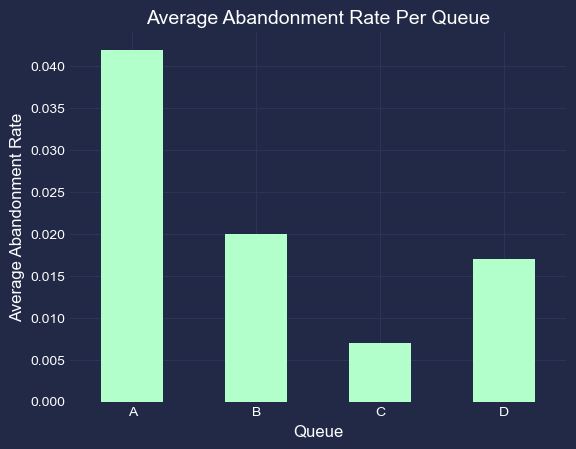

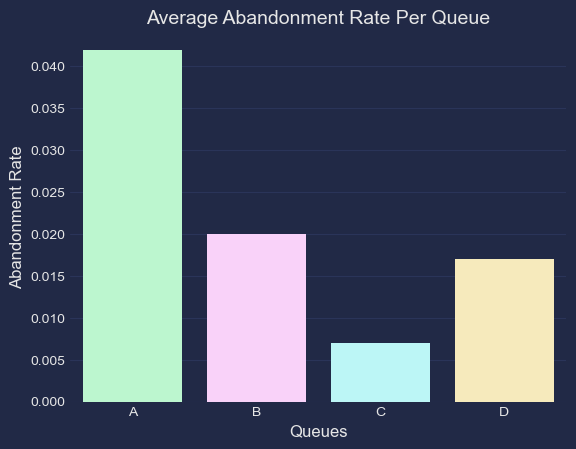

In [85]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i]).round(3) 

abandonment_rates_df = pd.DataFrame(abandonment_rates, index=['Abandonment Rate']).T
print(abandonment_rates_df)
#Your Code Here:
import mplcyberpunk
style.use('cyberpunk')
colors = ['#b3ffcc', '#ffccff', '#b3ffff', '#fff0b3']

abandonment_rates_df.plot.bar(legend=False, color=colors)
plt.title('Average Abandonment Rate Per Queue', fontsize=14,color = 'white')
plt.xticks(color = 'white', rotation=0)
plt.yticks(color = 'white')
plt.xlabel('Queue', fontsize=12, color = 'white')
plt.ylabel('Average Abandonment Rate', fontsize=12, color = 'white')
plt.show()

    #### How do I make each bar a different colors with this plot.bar() and this data
    #### I couldn't figure it out so I did a seaborn bar chart and was able to
    
sb.barplot(data=abandonment_rates_df, x=abandonment_rates_df.index, y='Abandonment Rate', palette=colors)
plt.xticks(rotation=0)
plt.xlabel('Queues',fontsize=12)
plt.ylabel('Abandonment Rate', fontsize=12)
plt.title('Average Abandonment Rate Per Queue', fontsize=14)
plt.show()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar graph for both of these. Similarly, We wanted to show and compare the average speed of an answer for each rep as well as the service level percentage for each rep. I put these in two bar charts side by side.

        Calls_x  Calls_y  Service Level %
Rep ID                                   
Amanda        3        5        60.000000
Andy          3       10        30.000000
Brent         6        8        75.000000
Cam           5       11        45.454545
Duke          6       14        42.857143
Joe           2       10        20.000000
Lilly         4       12        33.333333
Todd          2        6        33.333333
Xander        2        6        33.333333


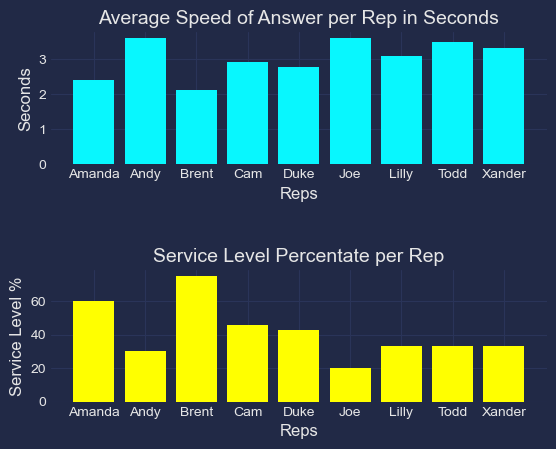

In [45]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table
quick_stats

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  
total_stats

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")
service_level

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
print(service_level)
#Your Code Here:
plt.subplot(2,1,1)
plt.title('Average Speed of Answer per Rep in Seconds', fontsize=14)
plt.xlabel('Reps', fontsize=12)
plt.ylabel('Seconds', fontsize=12)

plt.bar(north_plt["Rep ID"], north_plt["Incoming Wait Time"])

plt.subplots_adjust(hspace=0.8)
plt.subplot(2,1,2)
plt.title('Service Level Percentate per Rep', fontsize=14)
plt.xlabel('Reps', fontsize=12)
plt.ylabel('Service Level %', fontsize=12)
plt.bar(service_level.index, service_level['Service Level %'],color="yellow")
# plt.figure(15,5) --I was getting an error when I tried to adjust size

plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I would prefer the Grouped Bar Chart, but I also did the Stack Bar Chart. Again, I feel like this gives a good visual of the different amount of each call type (Incoming vs Outgoing) with in each Call Purpose, all side by side.

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64
{'Incoming': 51}
{'Outgoing': 123, 'Incoming': 75}
{'Outgoing': 228, 'Incoming': 82}
                 Incoming  Outgoing
Complaints             51       NaN
Sales Support          75     123.0
Product Support        82     228.0


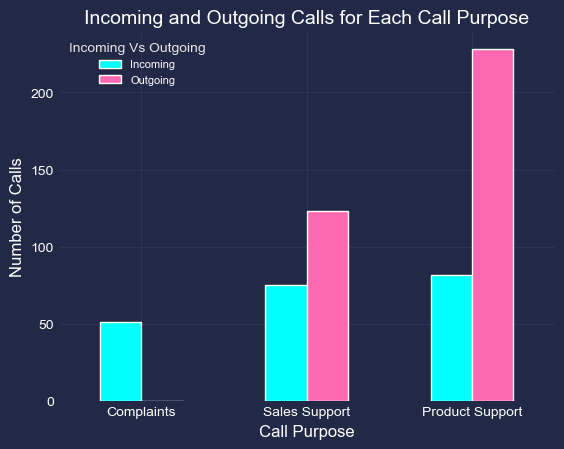

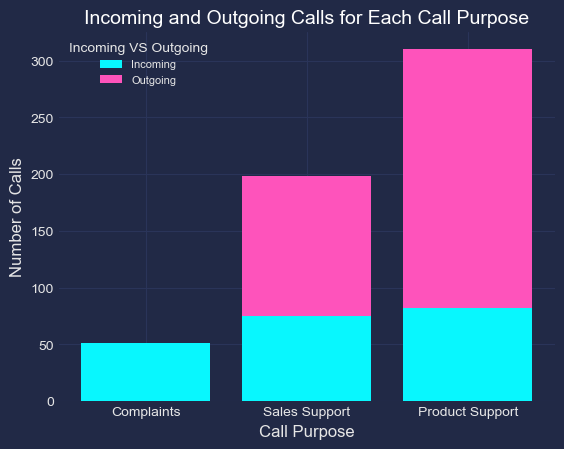

In [83]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

data ={  
'Complaints':  purpose_counts["Complaint"].to_dict(),
'Sales Support': purpose_counts["Sales Support"].to_dict(),
'Product Support': purpose_counts["Product Support"].to_dict()
}

new_df_purpose_counts = pd.DataFrame.from_dict(data, orient='index')

print(complaints)
print(sales_support)
print(product_support)
print(new_df_purpose_counts)
#Your Code Here:

colors = ['aqua', 'hotpink']

new_df_purpose_counts.plot.bar(edgecolor='white', color=colors)
plt.title('Incoming and Outgoing Calls for Each Call Purpose', fontsize=14, color='white')
plt.xticks(color = 'white', rotation=0)
plt.yticks(color = 'white')
plt.xlabel('Call Purpose', fontsize=12, color = 'white')
plt.ylabel('Number of Calls', fontsize=12, color = 'white')
plt.legend(title = 'Incoming Vs Outgoing', fontsize = 8, labelcolor='white')
plt.show()
## Again, not sure how to rotate the x-axis tick labels

fig, ax = plt.subplots()
ax.bar(new_df_purpose_counts.index, new_df_purpose_counts['Incoming'], label='Incoming')
ax.bar(new_df_purpose_counts.index, new_df_purpose_counts['Outgoing'], bottom=new_df_purpose_counts['Incoming'], label='Outgoing')
ax.set_title('Incoming and Outgoing Calls for Each Call Purpose', fontsize=14, color='white')
ax.set_xlabel('Call Purpose', fontsize= 12)
ax.set_ylabel('Number of Calls', fontsize=12)
ax.legend(title='Incoming VS Outgoing', fontsize=8, loc='upper left')
plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why:

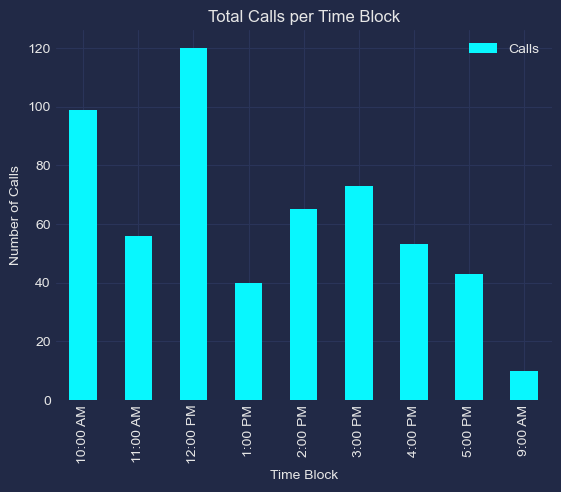

In [73]:
# Create your Bonus Mission visualization here!
# call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
# call_times

call_times = df[["Time Block", "Call Purpose", "Calls"]]
call_times

## I chose to remove incoming or outgoing, because we are looking at the total
## number of calls in each time block for each call purpose

# Use groupby to plot based on time blocks:
total_call_types = call_times.groupby('Time Block').sum()
total_call_types.plot.bar()
plt.xlabel('Time Block')
plt.ylabel('Number of Calls')
plt.title('Total Calls per Time Block')
plt.show()



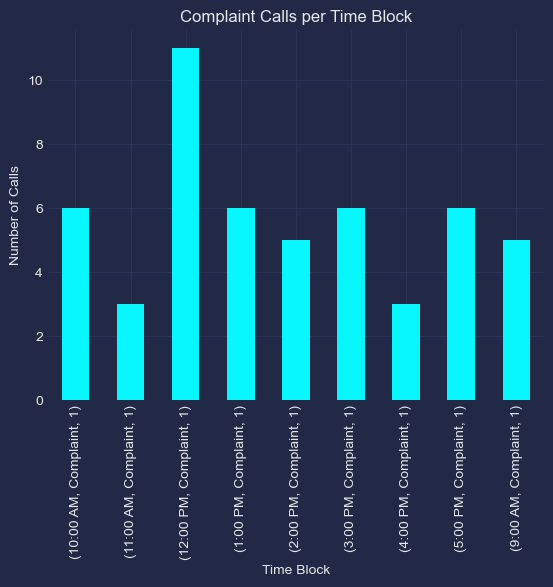

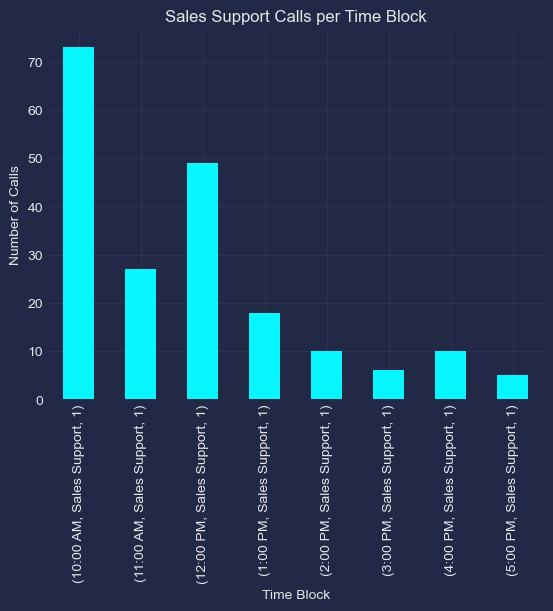

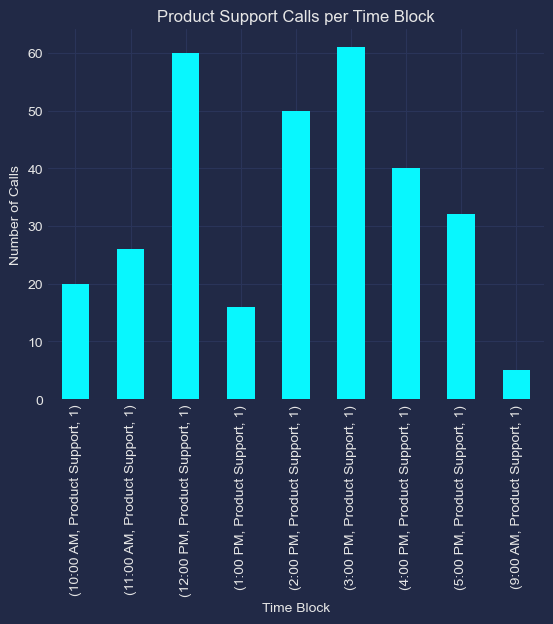

In [90]:
# Use groupby and get_group to select which call purpose to plot:

complaint_times = call_times.groupby('Call Purpose').get_group('Complaint').value_counts().sort_index()
complaint_times.plot.bar()
plt.xlabel('Time Block')
plt.ylabel('Number of Calls')
plt.title('Complaint Calls per Time Block')
plt.show()


sales_times = call_times.groupby('Call Purpose').get_group('Sales Support').value_counts().sort_index()
sales_times.plot.bar()
plt.xlabel('Time Block')
plt.ylabel('Number of Calls')
plt.title('Sales Support Calls per Time Block')
plt.show()


product_times = call_times.groupby('Call Purpose').get_group('Product Support').value_counts().sort_index()
product_times.plot.bar()
plt.xlabel('Time Block')
plt.ylabel('Number of Calls')
plt.title('Product Support Calls per Time Block')
plt.show()

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of ticklabels (559).

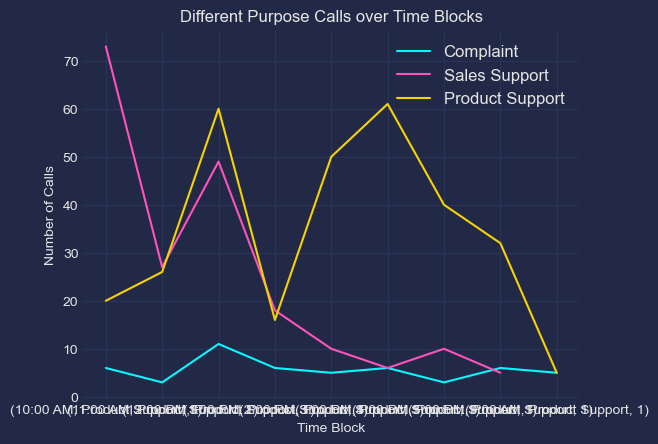

In [106]:

complaint_times = call_times.groupby('Call Purpose').get_group('Complaint').value_counts().sort_index()
complaint_times.plot(kind='line', label="Complaint")
sales_times = call_times.groupby('Call Purpose').get_group('Sales Support').value_counts().sort_index()
sales_times.plot(kind='line', label = 'Sales Support')
product_times = call_times.groupby('Call Purpose').get_group('Product Support').value_counts().sort_index()
product_times.plot(kind='line', label = 'Product Support')
plt.legend(loc = 'upper right', fontsize = 12)
plt.xlabel('Time Block')
plt.ylabel('Number of Calls')
plt.title('Different Purpose Calls over Time Blocks')
plt.xticks(ticks=range(len(complaint_times)), labels=call_times['Time Block'], rotation=45, fontsize=10)
plt.show()



### I did some playing around to see if I could make it easier to plot the three with a functions, as well clean up the x-axis to just display the time blocks. I was having a difficult time trying to do this while still using the .get_group() method above.

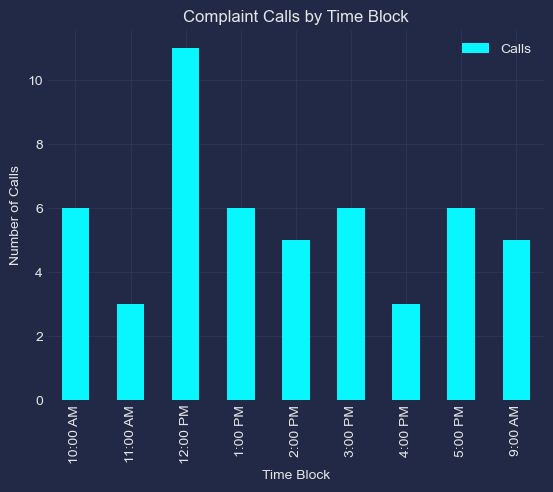

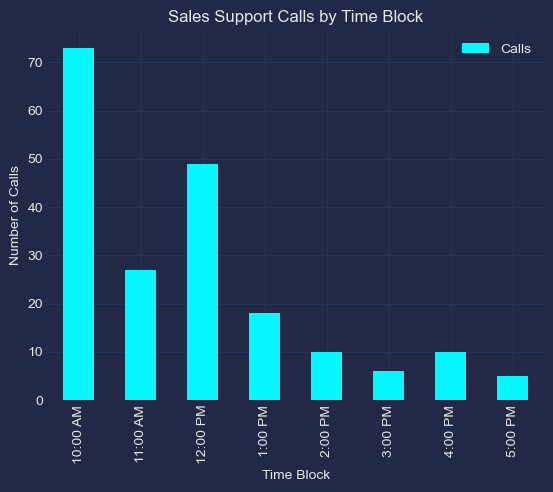

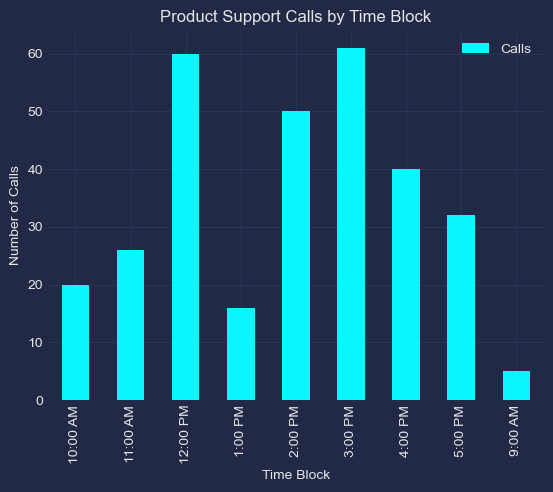

In [72]:
def plot_call_purpose(call_purpose):
    call_times = df[['Time Block', 'Call Purpose', 'Incoming or Outgoing', 'Calls']]
    call_purpose_times = call_times.groupby(['Time Block', 'Call Purpose']).sum().reset_index()
    call_purpose_times = call_purpose_times[call_purpose_times['Call Purpose'] == call_purpose]
    ax = call_purpose_times.plot.bar(x='Time Block', y='Calls')
    ax.set_xlabel('Time Block')
    ax.set_ylabel('Number of Calls')
    ax.set_title(f'{call_purpose} Calls by Time Block')

plot_call_purpose('Complaint')
plot_call_purpose('Sales Support')
plot_call_purpose('Product Support')
